Install requirements

In [100]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Imports

In [101]:
# data processing
import pandas as pd
import numpy as np
import glob
import re
from scipy.stats import zscore

# data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning library
import sklearn
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

Preprocess_and_clean_data

In [102]:
def concat_csvs(path: str ='data/*.csv') -> pd.DataFrame:
    csv_files = glob.glob(path)
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        dfs.append(df)
    return pd.concat(dfs, axis=0, ignore_index=True)

def lower_and_fix_col_names(df: pd.DataFrame) -> pd.DataFrame:
    df.columns = df.columns.str.lower()
    df.rename(columns={"messurements": "measurements", "colour": "color"}, inplace=True)
    return df

def split_measurements(df: pd.DataFrame) -> pd.DataFrame:
    new_columns = ["length", "width", "depth"]

    def extract_numbers(measurement_str):
        return map(float, re.findall(r"\d+\.\d+|\d+", measurement_str))

    extracted_data = [list(extract_numbers(entry)) for entry in df["measurements"].astype(str)]
    df[new_columns] = pd.DataFrame(extracted_data, columns=new_columns, dtype=np.float64)
    df = df.drop('measurements', axis=1)
    return df

def convert_price(df: pd.DataFrame) -> pd.DataFrame:
    df['price'] = df['price'].str.replace(',', '').astype('float64')
    return df

df = concat_csvs('data/*.csv')
df = lower_and_fix_col_names(df)
df = split_measurements(df)
df = convert_price(df)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339 entries, 0 to 6338
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6339 non-null   object 
 1   shape         6339 non-null   object 
 2   weight        6339 non-null   float64
 3   clarity       6319 non-null   object 
 4   color         6339 non-null   object 
 5   cut           6337 non-null   object 
 6   polish        6338 non-null   object 
 7   symmetry      6332 non-null   object 
 8   fluorescence  6337 non-null   object 
 9   price         6339 non-null   float64
 10  length        6339 non-null   float64
 11  width         6339 non-null   float64
 12  depth         6339 non-null   float64
dtypes: float64(5), object(8)
memory usage: 643.9+ KB


In [104]:
df.dropna(inplace=True)

In [105]:
def encode_shape(df: pd.DataFrame) -> pd.DataFrame:
    encoded_df = pd.get_dummies(df['shape'], prefix='shape')
    df = pd.concat([df, encoded_df], axis=1)
    return df

def encode_clarity(df: pd.DataFrame) -> pd.DataFrame:
    clarity_order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']
    encoder = OrdinalEncoder(categories=[clarity_order])
    df['encoded_clarity'] = encoder.fit_transform(df[['clarity']])
    return df

def encode_color(df: pd.DataFrame) -> pd.DataFrame:
    color_order = ['FANCY', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'O-P', 'Q-R', 'S-T', 'U-V', 'W', 'W-X', 'Y-Z']
    encoder = OrdinalEncoder(categories=[color_order])
    df['encoded_color'] = encoder.fit_transform(df[['color']])
    return df

def encode_cut(df: pd.DataFrame) -> pd.DataFrame:
    cut_order = ['EX', 'VG', 'GD', 'F']
    encoder = OrdinalEncoder(categories=[cut_order])
    df['encoded_cut'] = encoder.fit_transform(df[['cut']])
    return df

def encode_polish(df: pd.DataFrame) -> pd.DataFrame:
    polish_order = ['EX', 'VG', 'GD', 'F']
    encoder = OrdinalEncoder(categories=[polish_order])
    df['encoded_polish'] = encoder.fit_transform(df[['polish']])
    return df

def encode_symmetry(df: pd.DataFrame) -> pd.DataFrame:
    symmetry_order = ['EX', 'VG', 'GD', 'FR']
    encoder = OrdinalEncoder(categories=[symmetry_order])
    df['encoded_symmetry'] = encoder.fit_transform(df[['symmetry']])
    return df

def encode_fluorescence(df: pd.DataFrame) -> pd.DataFrame:
    fluorescence_order = ['N', 'VSL', 'SL', 'F', 'M', 'ST', 'VS']
    encoder = OrdinalEncoder(categories=[fluorescence_order])
    df['encoded_fluorescence'] = encoder.fit_transform(df[['fluorescence']])
    return df

def encode_categorical(df: pd.DataFrame) -> pd.DataFrame:
    df = encode_shape(df)
    df = encode_clarity(df)
    df = encode_color(df)
    df = encode_cut(df)
    df = encode_polish(df)
    df = encode_symmetry(df)
    df = encode_fluorescence(df)
    return df

df = encode_categorical(df)
df.describe()

,weight,price,length,width,depth,shape_CUSHION,shape_EMERALD,shape_HEART,shape_MARQUISE,shape_OVAL,shape_PEAR,shape_PRINCESS,shape_ROUND,encoded_clarity,encoded_color,encoded_cut,encoded_polish,encoded_symmetry,encoded_fluorescence
count,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000
mean,0.622448,2446.604337,5.422374,4.788970,3.087118,0.262082,0.091745,0.054666,0.010775,0.105847,0.050230,0.098875,0.325780,4.939312,4.253842,0.342576,0.210743,0.910157,1.074315
std,0.382771,4044.123266,1.202607,0.749416,0.512040,0.439802,0.288688,0.227346,0.103249,0.307666,0.218436,0.298518,0.468703,1.574850,3.004153,0.597054,0.434946,0.704531,1.678245
min,0.180000,683.220000,3.540000,3.010000,1.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.430000,1292.555000,4.710000,4.350000,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1881.820000,5.100000,4.890000,3.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,0.000000,0.000000,1.000000,0.000000
75%,0.710000,2232.640000,5.850000,5.160000,3.310000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,1.000000,0.000000,1.000000,3.000000
max,6.020000,76147.680000,12.520000,9.850000,6.660000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,19.000000,3.000000,3.000000,3.000000,6.000000


In [106]:
z_score = zscore(df['price']) 
threshold = 3
df = df[abs(z_score) < threshold]
df.to_csv('data/diamond_features_preprocessed.csv', index=False)

In [107]:
df.describe()

,weight,price,length,width,depth,shape_CUSHION,shape_EMERALD,shape_HEART,shape_MARQUISE,shape_OVAL,shape_PEAR,shape_PRINCESS,shape_ROUND,encoded_clarity,encoded_color,encoded_cut,encoded_polish,encoded_symmetry,encoded_fluorescence
count,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000
mean,0.597001,2079.634171,5.372983,4.755067,3.063999,0.257184,0.092952,0.055386,0.010917,0.107240,0.046075,0.100177,0.330069,4.939798,4.272596,0.343715,0.212715,0.917322,1.066463
std,0.293683,1448.599718,1.116899,0.686268,0.467528,0.437117,0.290389,0.228751,0.103919,0.309443,0.209664,0.300259,0.470275,1.570053,3.007727,0.598798,0.436595,0.703969,1.672460
min,0.180000,683.220000,3.540000,3.010000,1.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.420000,1287.100000,4.700000,4.350000,2.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1865.760000,5.090000,4.870000,3.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,0.000000,0.000000,1.000000,0.000000
75%,0.700000,2187.190000,5.800000,5.150000,3.290000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,1.000000,0.000000,1.000000,3.000000
max,3.710000,13643.460000,12.050000,8.370000,5.740000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,19.000000,3.000000,3.000000,3.000000,6.000000


In [108]:
df = pd.read_csv('data/diamond_features_preprocessed.csv')

2. Data Analysis

Visualization 1: histograms of categorical features.
I think it's important to use that visualization because it helps you get an overview of each feature's distribution.
It helps you understand how "balanced" is your dataset with respect to each feature.
Meaning helps you see which feature values are represented well within the dataset and which are not.
In some cases it can also help you spot outliers. In our case we can see that in some cases the feature distribute normally while others are not, and we have some very imbalanced features, for example "polish".

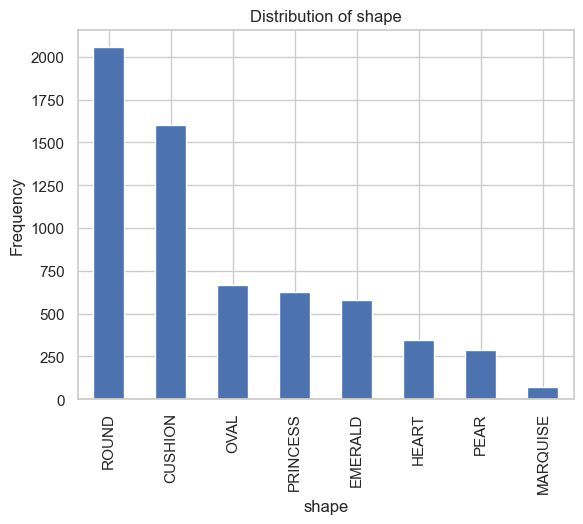

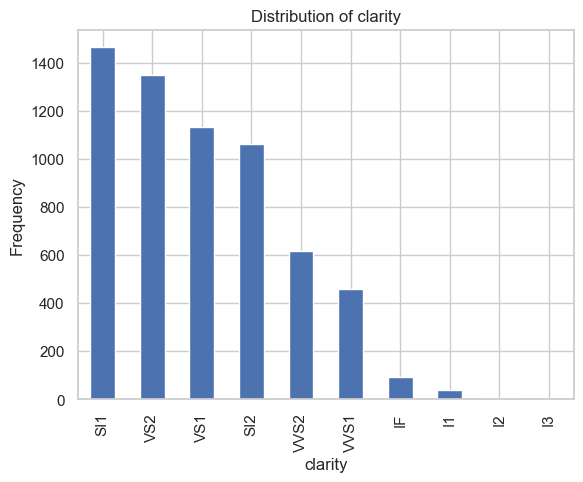

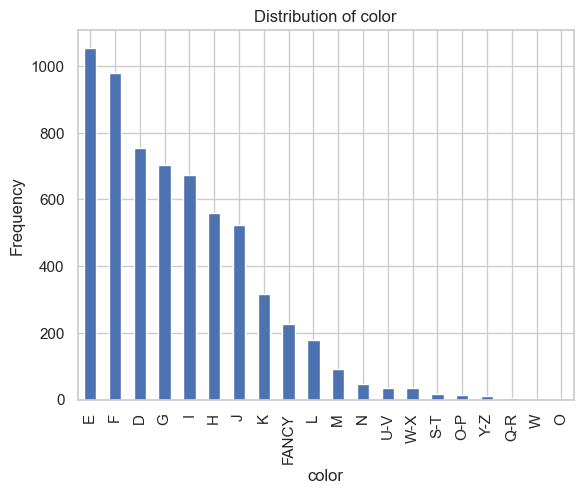

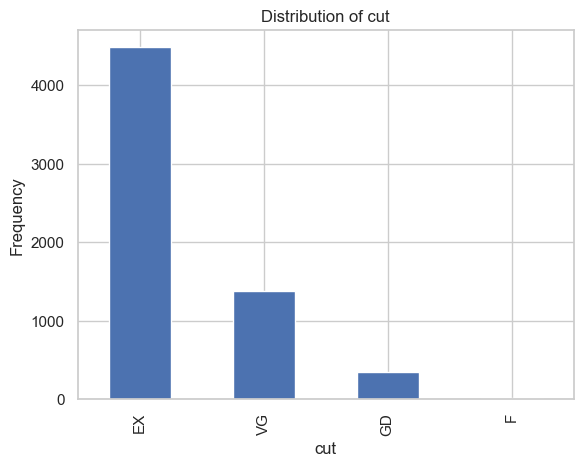

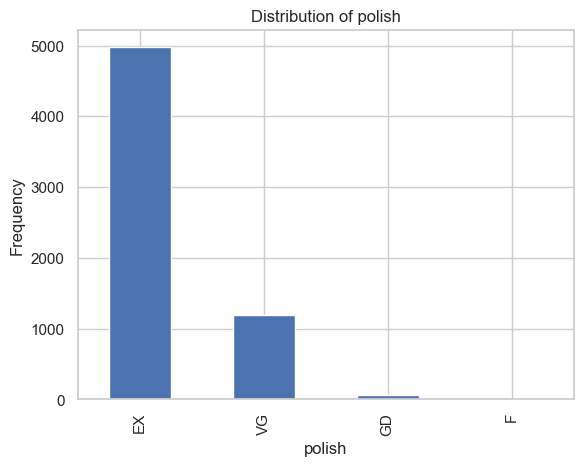

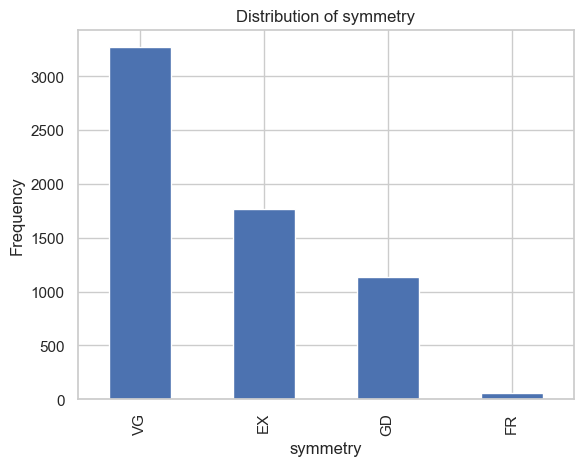

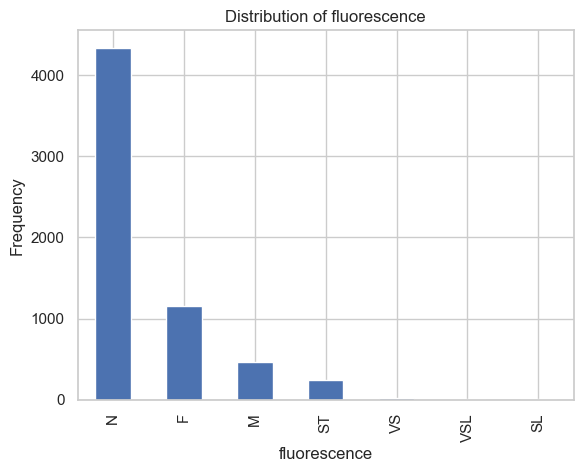

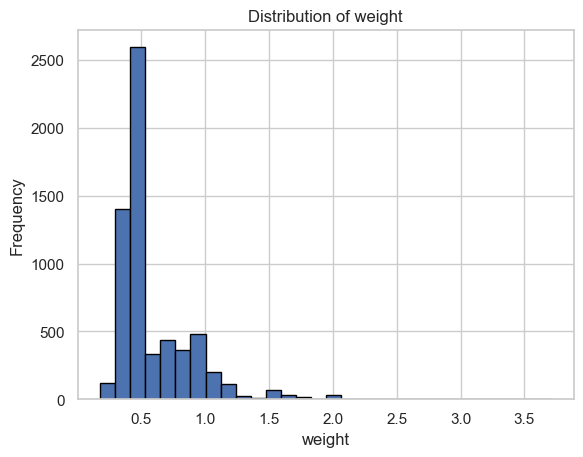

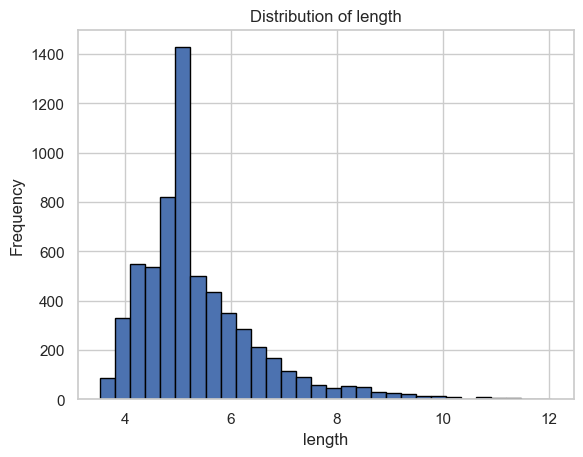

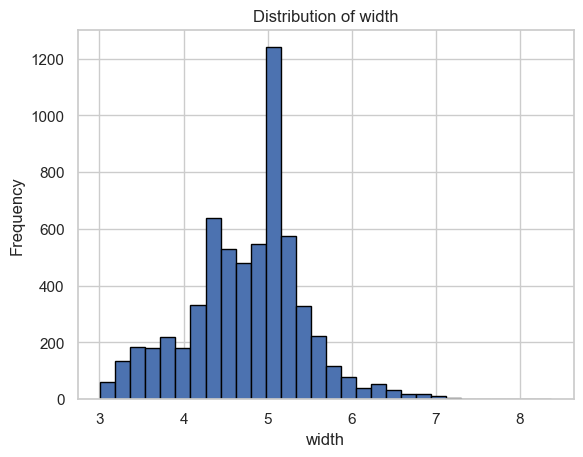

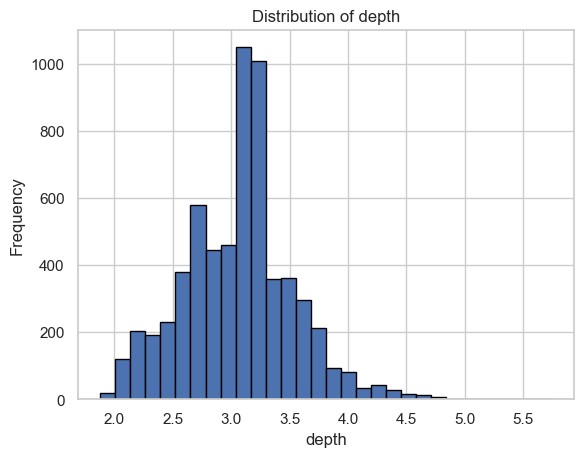

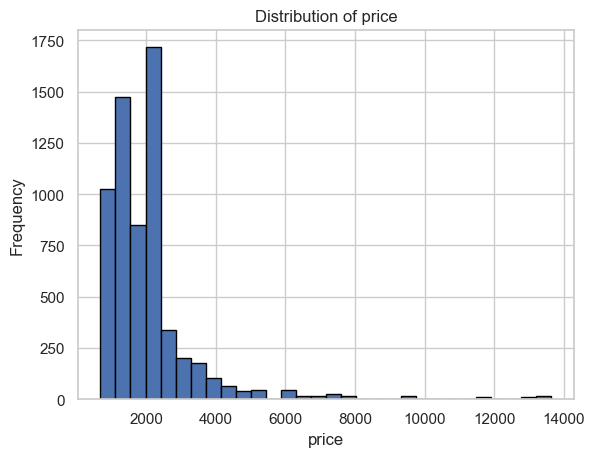

In [113]:
# Plot unique value distributions for each categorical variable 
categorical_columns = ['shape', 'clarity', 'color', 'cut', 'polish', 'symmetry', 'fluorescence']

for column in categorical_columns:
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', title=f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
numerical_columns = ['weight', 'length', 'width', 'depth', 'price']
for column in numerical_columns:
        df[column].plot(kind='hist', bins=30, title=f'Distribution of {column}', edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    

Visualization 2: correlation between features and the target feature (price).
I think this visualization is important because it helps us identify relationships between the target and the other features.
Not less important, it helps us identify relationship between the other features.
In our case: We can spot that the price is highly correlated with the weight of the diamond, but, in addition: weight, width, length, and depth are correlated as well and that means they provide overlapping information and thus some are redundant.

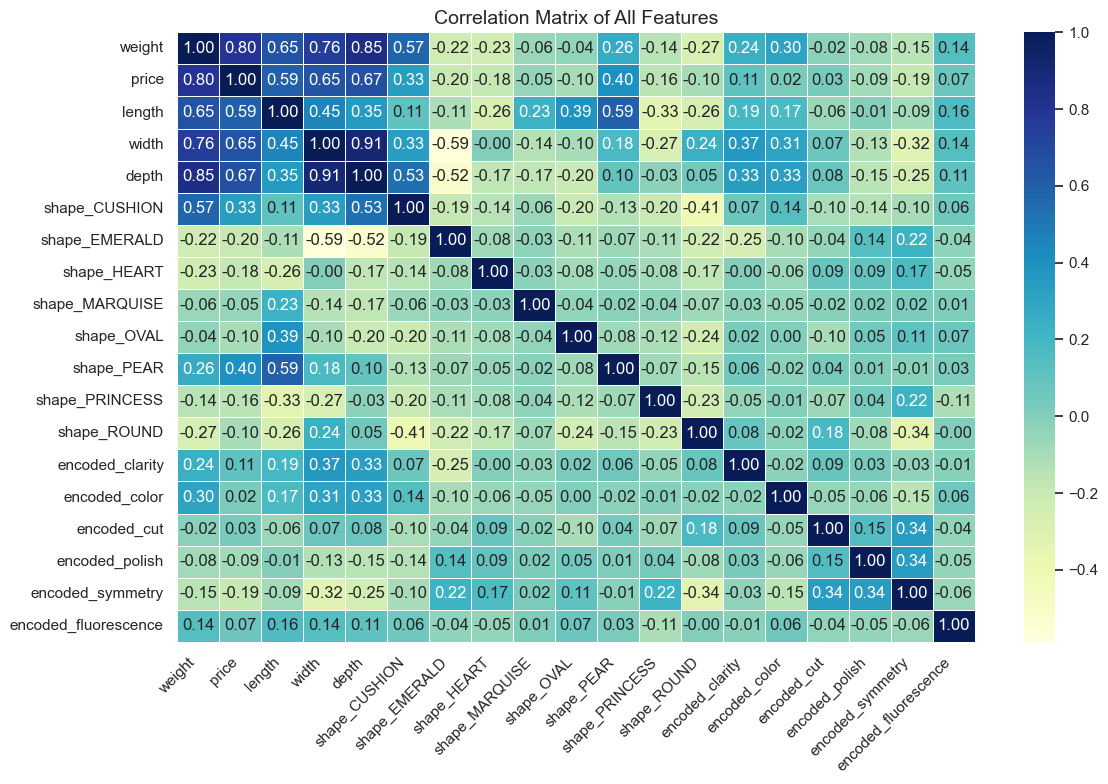

In [117]:
# Calculate correlation between all features
df_corr = df.corr(method='pearson')

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height as needed

# Plot the heatmap
sns.heatmap(
    df_corr, 
    annot=True, 
    fmt='.2f', 
    cmap="YlGnBu", 
    cbar=True, 
    linewidths=0.5, 
    ax=ax
)

# Adjust tick label rotation for readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Matrix of All Features', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Visualization 3: violin graph of the price given a binned weight (binned by 0.5 jumps up to 3 because for sizes bigger than that the data is really sparse), where each bin includes the number of instances.
In our case: we can see that as we get to a bin that holds a larger weight span, the median prices increase as well, and it's hard to see, but I think that it's also in growing fashion. In addition, we can see that as we get to a bin that holds a larger weight span the distribution of prices grows larger (with exemption of the rightmost bin that has only 2 samples), and finally of course we can get a feel of the densities.

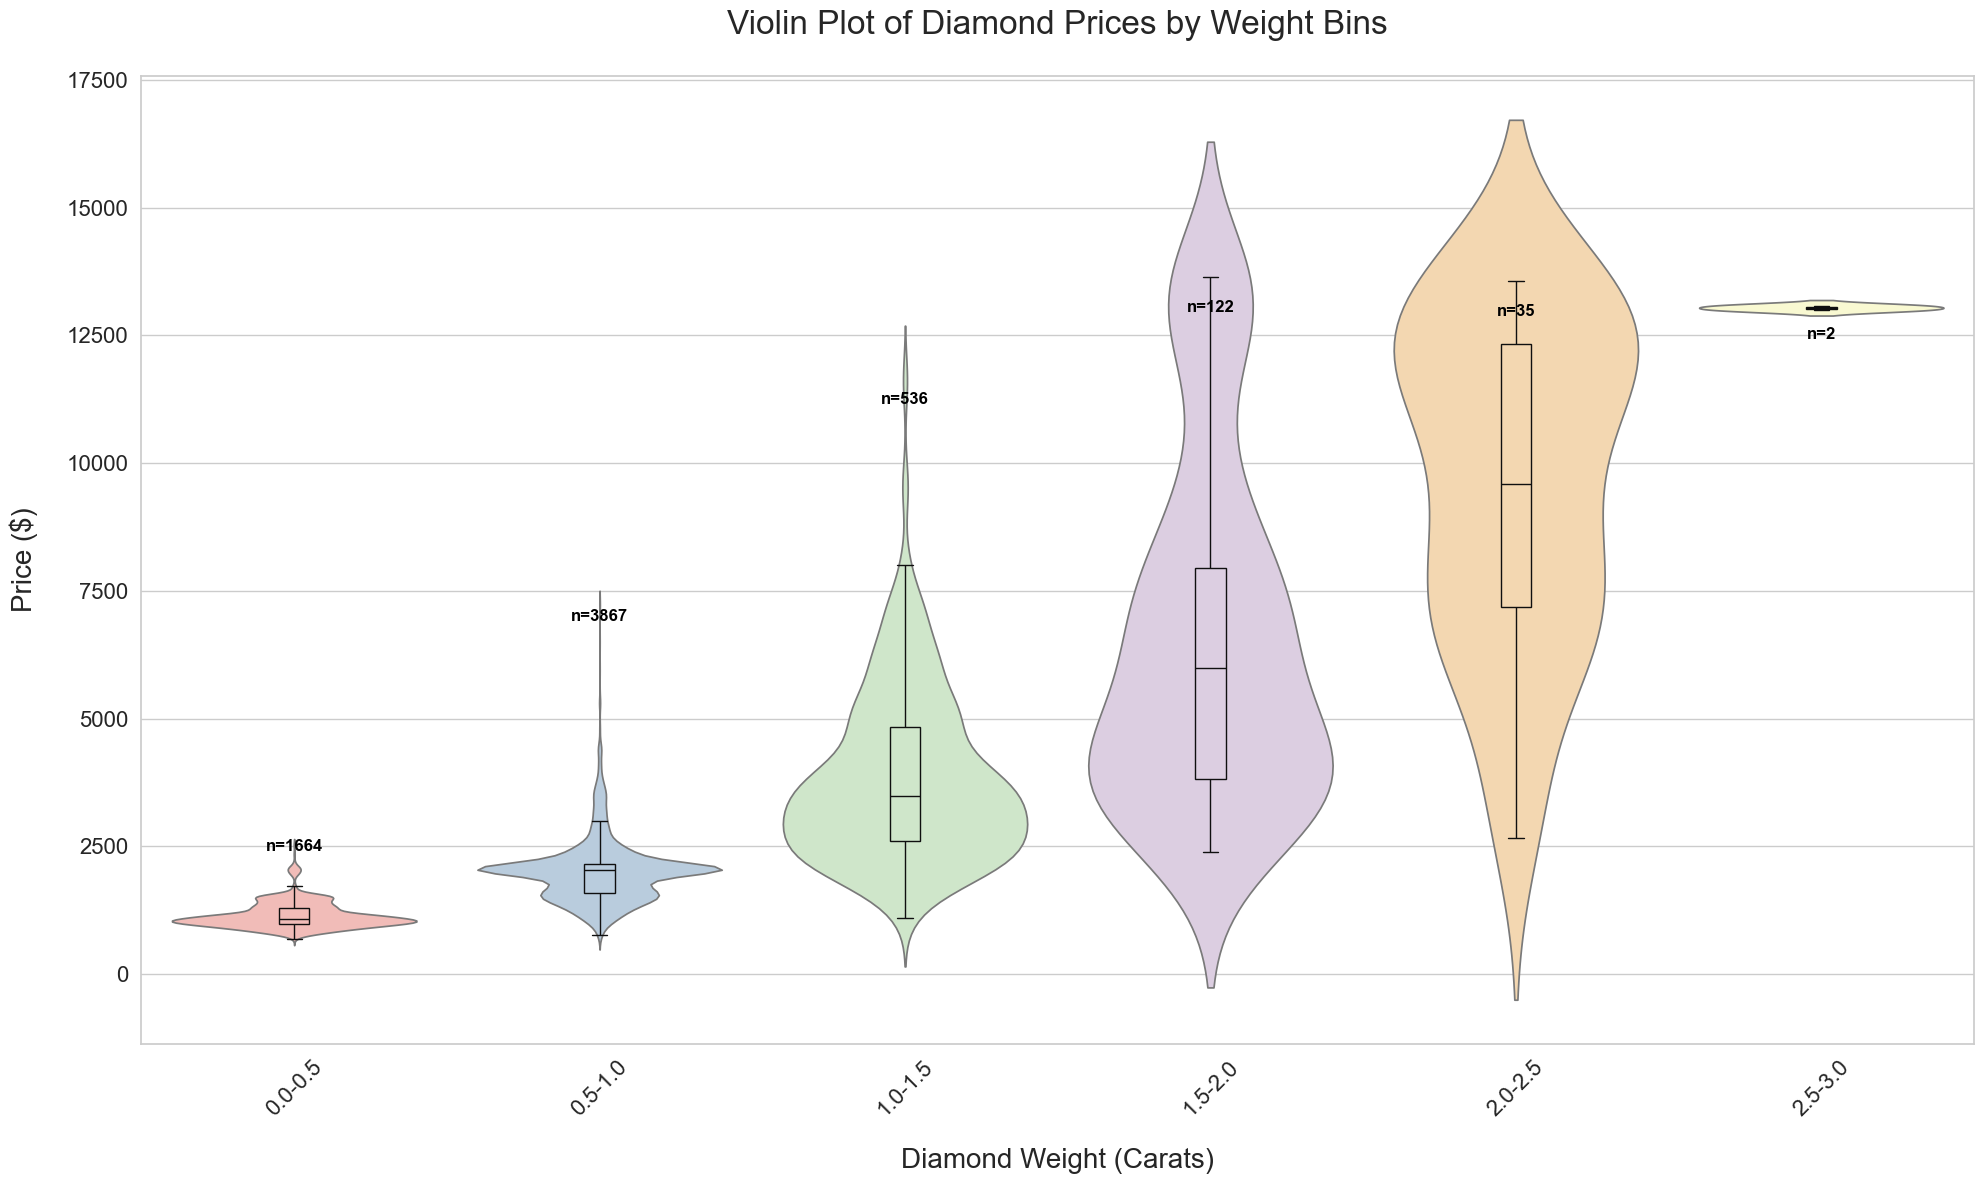

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your existing DataFrame with 'weight' and 'price' columns

# 1. Define the bin edges
bin_width = 0.5
num_bins = 6
bins = [i * bin_width for i in range(num_bins + 1)]  # 0, 0.5, 1.0, ..., 6.0

# 2. Assign each diamond to a weight bin
df['weight_bin'] = pd.cut(df['weight'], bins=bins, right=False, include_lowest=True)

# 3. Create bin labels as strings for better readability
bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df['weight_bin_label'] = df['weight_bin'].apply(lambda x: f"{x.left}-{x.right}")

# 4. Count the number of instances per bin
bin_counts = df['weight_bin_label'].value_counts().reindex(bin_labels)

# 5. Initialize the matplotlib figure with a larger size and constrained layout
fig, ax = plt.subplots(figsize=(20, 12), constrained_layout=True)

# 6. Create the violin plot
sns.violinplot(
    x='weight_bin_label',
    y='price',
    data=df,
    order=bin_labels,
    inner=None,  # Remove default inner annotations
    palette='Pastel1',
    ax=ax
)

# 7. Overlay the box plot for additional summary statistics
sns.boxplot(
    x='weight_bin_label',
    y='price',
    data=df,
    order=bin_labels,
    width=0.1,
    showcaps=True,
    boxprops={'facecolor':'none'},
    showfliers=False,
    whiskerprops={'linewidth':1},
    saturation=1,
    color='k',
    ax=ax
)

# 8. Add count labels within each violin
for i, bin_label in enumerate(bin_labels):
    count = bin_counts[bin_label]
    # Find the maximum price in the current bin
    bin_data = df[df['weight_bin_label'] == bin_label]['price']
    if not bin_data.empty:
        bin_max_price = bin_data.max()
        label_y = bin_max_price * 0.95  # 95% of the bin's max price
        ax.text(
            i,
            label_y,
            f'n={count}',
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='semibold'
        )

# 9. Customize the plot with titles and labels
ax.set_title('Violin Plot of Diamond Prices by Weight Bins', fontsize=24, pad=30)
ax.set_xlabel('Diamond Weight (Carats)', fontsize=20, labelpad=20)
ax.set_ylabel('Price ($)', fontsize=20, labelpad=20)
ax.tick_params(axis='x', labelrotation=45, labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# 10. Adjust y-axis limits to prevent clipping (optional if labels are within)
# ax.set_ylim(0, max_price * 1.15)  # Only if placing labels above violins

# 11. Adjust layout to prevent clipping
plt.tight_layout()

# 12. Save the plot (optional)
# plt.savefig('violin_plot_diamond_prices.png', dpi=300, bbox_inches='tight')

# 13. Display the plot
plt.show()

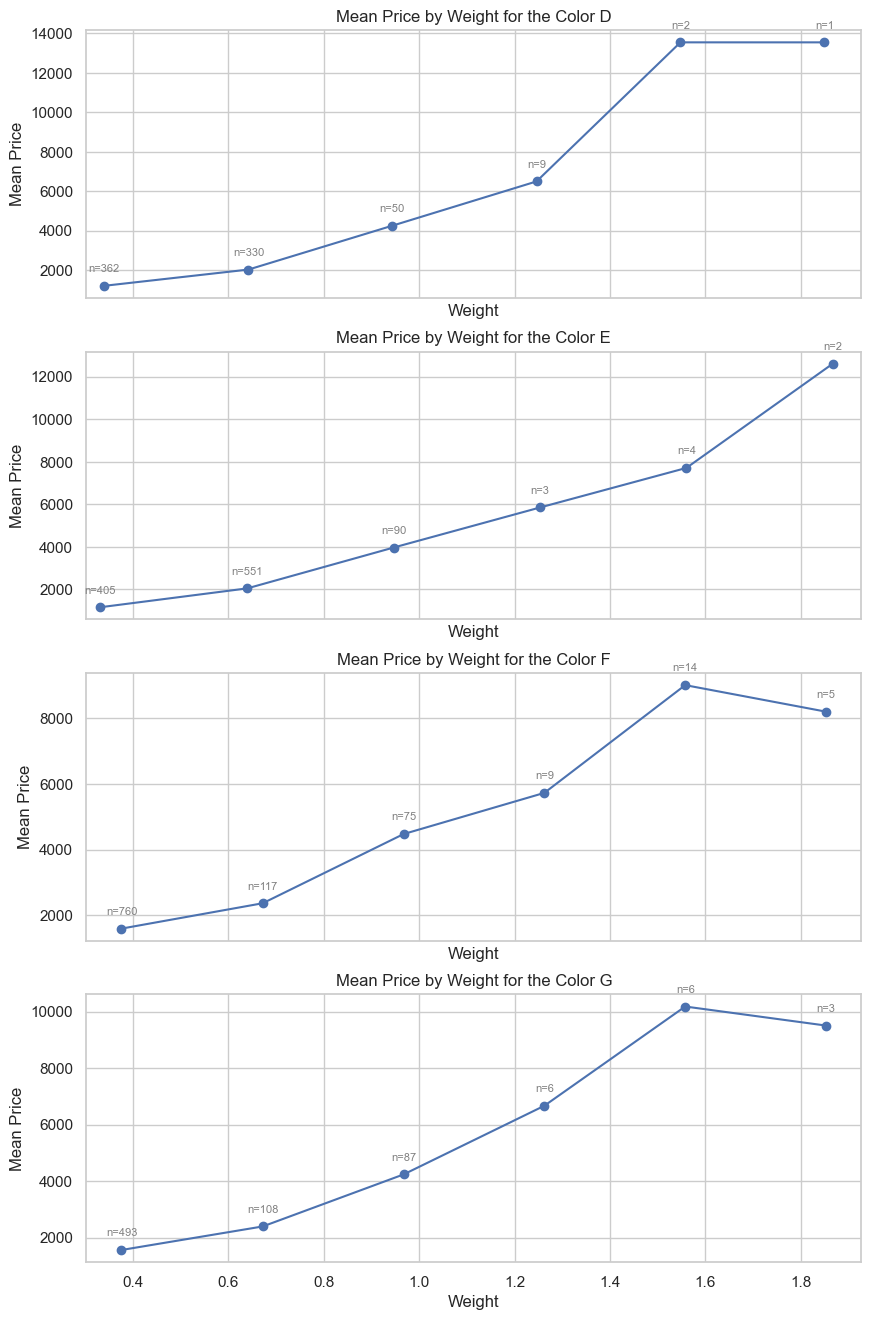

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the colors you want to plot
colors = ['D', 'E', 'F', 'G']

# Define the number of bins
num_bins = 6

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=len(colors), figsize=(10, 4 * len(colors)), sharex=True)

# If there's only one color, axes might not be an array
if len(colors) == 1:
    axes = [axes]

for ax, color in zip(axes, colors):
    # Filter the DataFrame for the current color
    filtered_df = df[df['color'] == color]
    
    # Check if filtered_df is empty
    if filtered_df.empty:
        ax.set_title(f"No data for color {color}")
        ax.set_xlabel("Weight")
        ax.set_ylabel("Mean Price")
        ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', 
                verticalalignment='center', transform=ax.transAxes)
        continue
    
    # Bin the 'weight' into specified number of bins
    bins = pd.cut(filtered_df['weight'], num_bins)
    
    # Group by the bins and calculate mean price and count
    grouped = filtered_df.groupby(bins)['price'].agg(['mean', 'count']).reset_index()
    
    # Extract midpoints for plotting
    grouped['mid'] = grouped['weight'].apply(lambda x: x.mid)
    
    # Plot the mean price using midpoints
    ax.plot(grouped['mid'], grouped['mean'], marker='o', linestyle='-', color='b', label='Mean Price')
    
    # Annotate each point with the count
    for _, row in grouped.iterrows():
        ax.annotate(f'n={row["count"]}', 
                    xy=(row['mid'], row['mean']), 
                    textcoords="offset points", 
                    xytext=(0,10),
                    ha='center', 
                    fontsize=8, 
                    color='gray')
    
    # Set titles and labels
    ax.set_title(f"Mean Price by Weight for the Color {color}")
    ax.set_xlabel("Weight")
    ax.set_ylabel("Mean Price")
    ax.grid(True)

    # Optional: Set x-axis limits based on bin edges
    ax.set_xlim(grouped['mid'].min() - (grouped['mid'].max()-grouped['mid'].min())*0.05,
                grouped['mid'].max() + (grouped['mid'].max()-grouped['mid'].min())*0.05)

plt.tight_layout()

In [27]:
filtered_df

,id,shape,weight,clarity,color,cut,polish,symmetry,fluorescence,price,length,width,depth
21,1788261,PRINCESS,0.30,VS2,G,EX,EX,VG,N,954.02,3.83,3.80,2.63
41,1800991,PRINCESS,0.37,VS1,G,EX,EX,GD,F,1067.76,3.94,3.87,2.81
72,1793440,PRINCESS,0.31,VVS2,G,EX,EX,GD,N,926.91,3.81,3.76,2.63
122,1772721,PRINCESS,0.30,VS1,G,VG,VG,GD,F,837.48,3.94,3.77,2.37
124,1763124,PRINCESS,0.30,VS2,G,EX,GD,FR,F,838.43,3.76,3.72,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,1794652,OVAL,0.66,VS2,G,VG,EX,GD,ST,2142.72,6.53,4.91,3.02
6298,1634425,OVAL,0.59,VVS1,G,EX,EX,VG,N,2246.26,7.27,4.63,2.72
6301,1660421,OVAL,0.65,VS1,G,EX,VG,VG,M,2250.86,6.86,5.05,2.92
6319,200669-13,OVAL,1.01,SI2,G,GD,VG,VG,N,2366.59,7.35,5.50,3.52


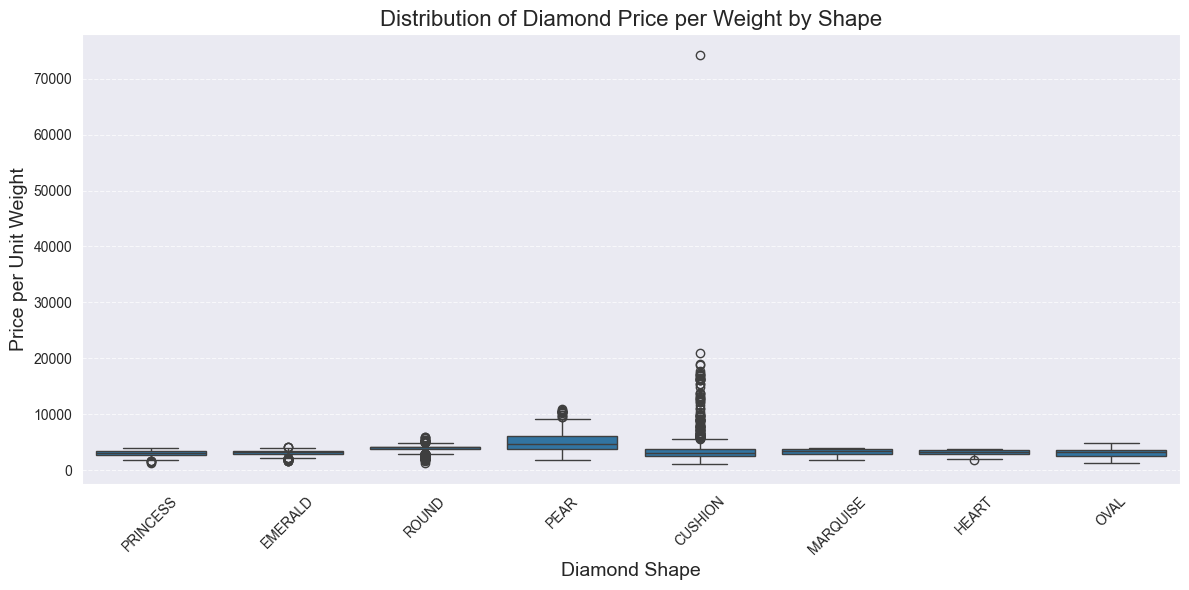

In [39]:
df['price_per_weight'] = df['price'] / df['weight']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='shape', y='price_per_weight')
plt.title('Distribution of Diamond Price per Weight by Shape', fontsize=16)
plt.xlabel('Diamond Shape', fontsize=14)
plt.ylabel('Price per Unit Weight', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

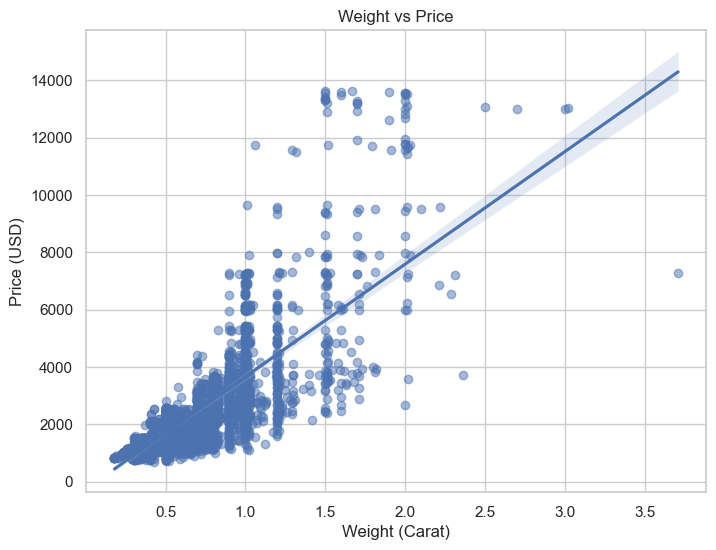

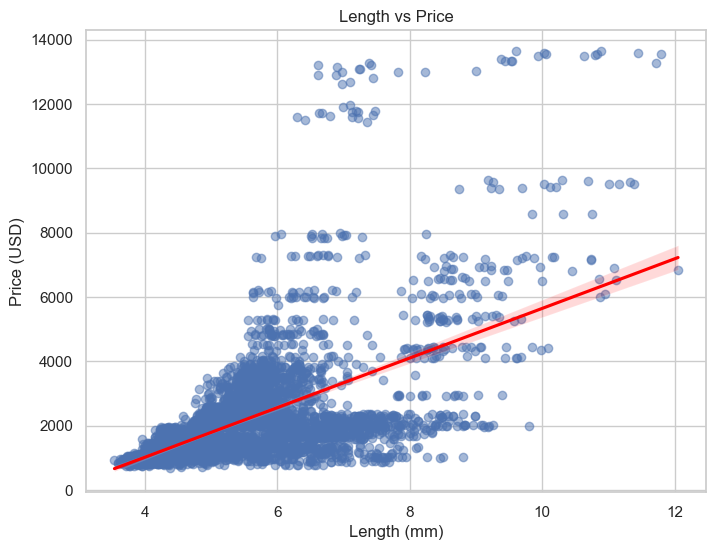

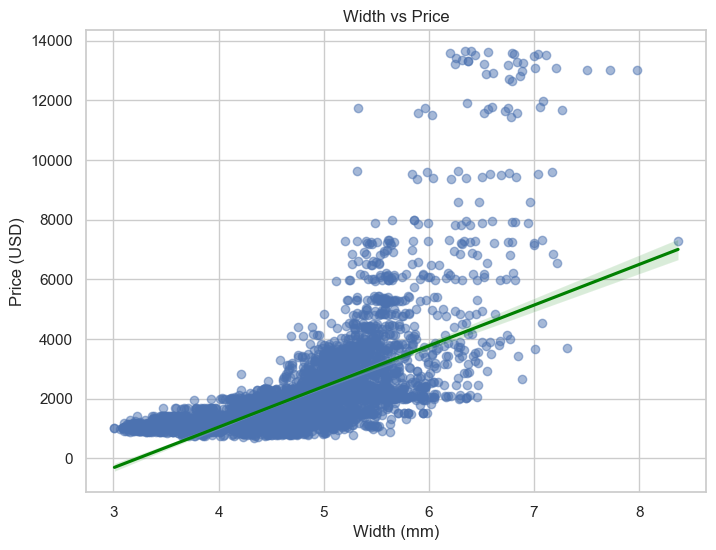

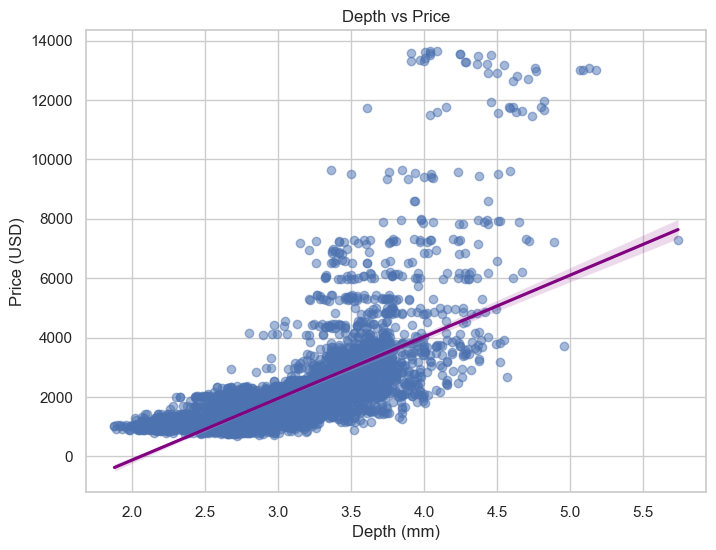

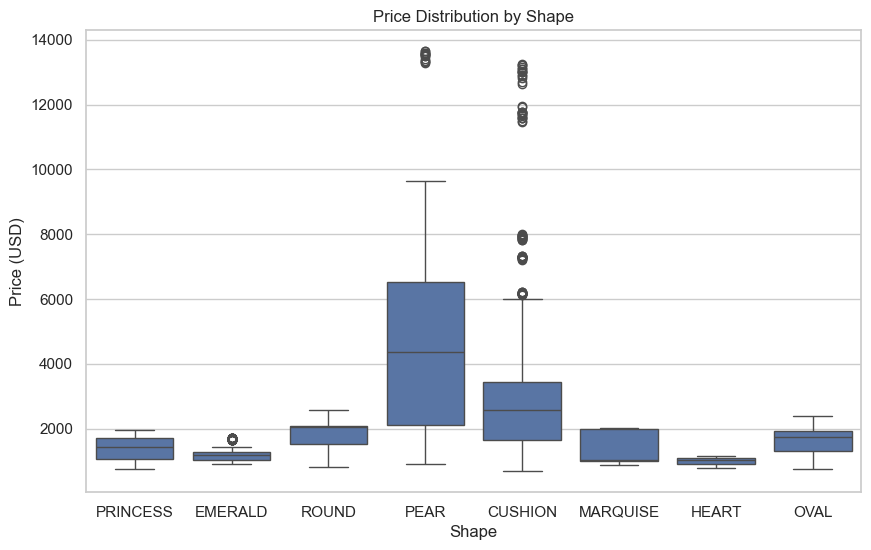

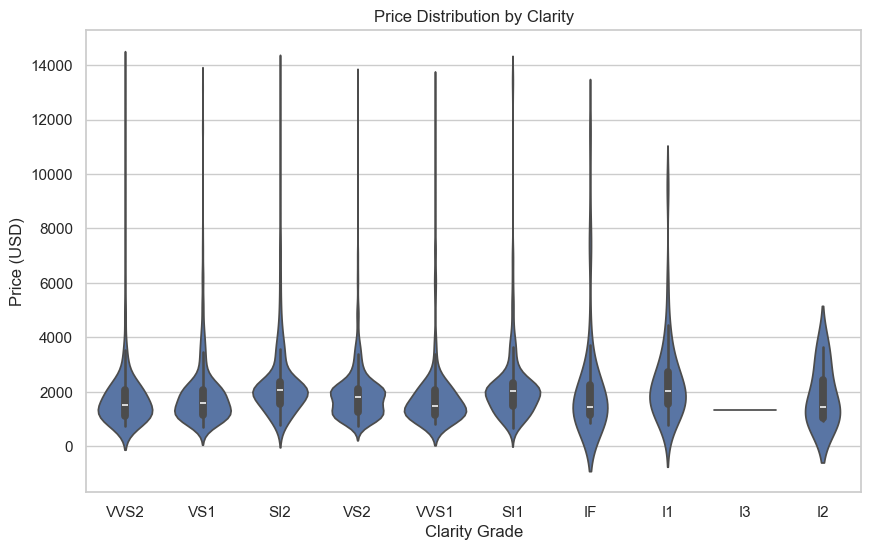

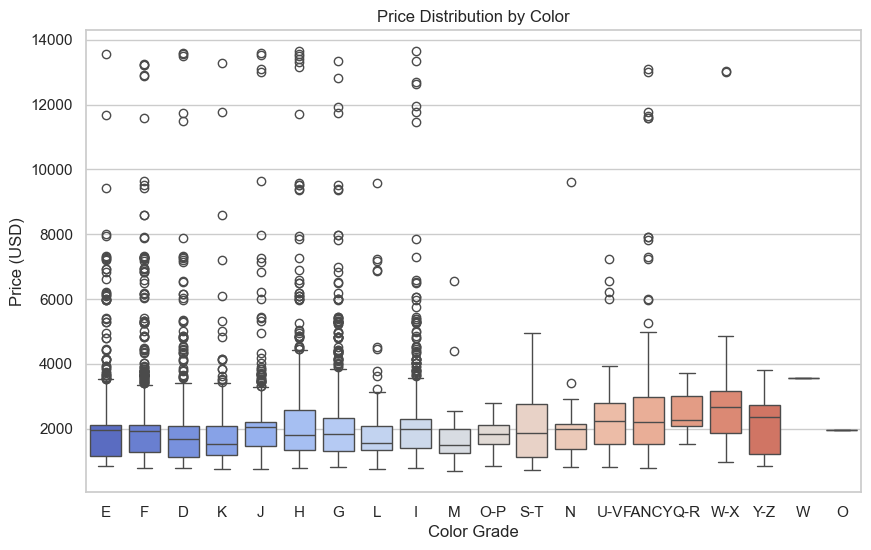

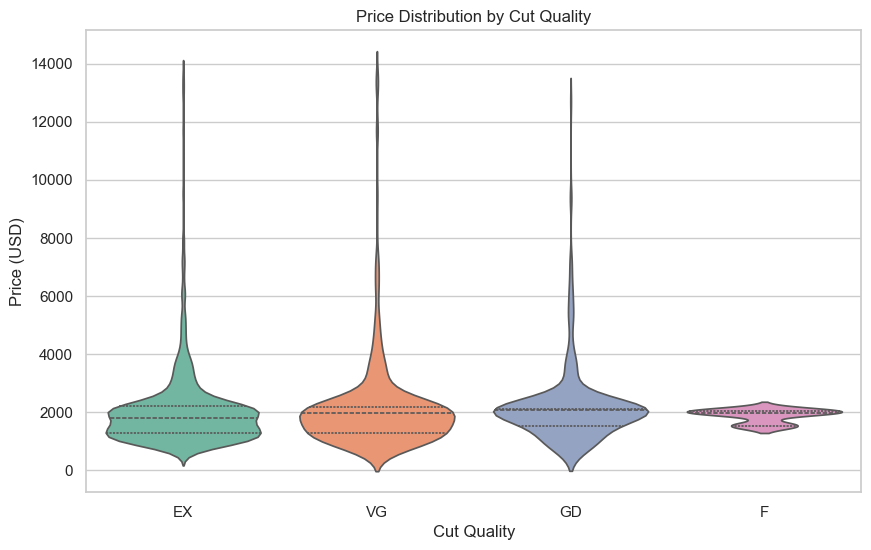

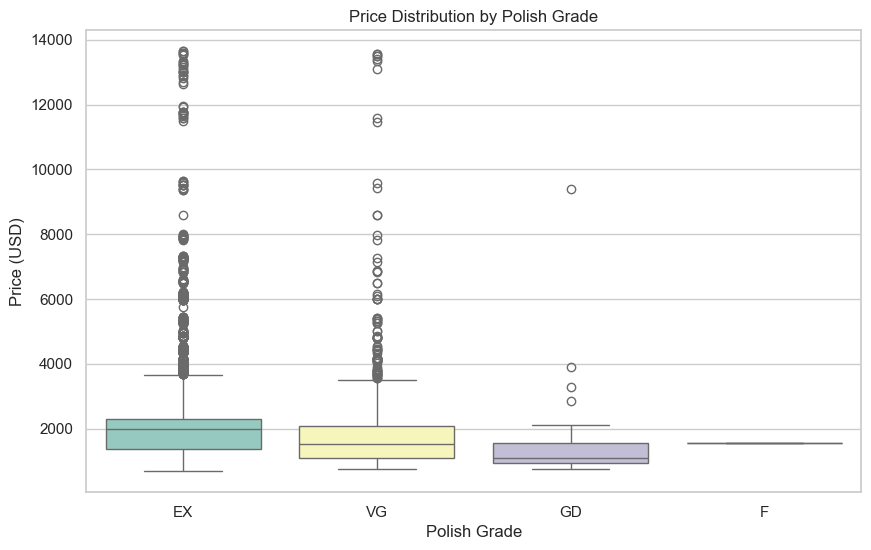

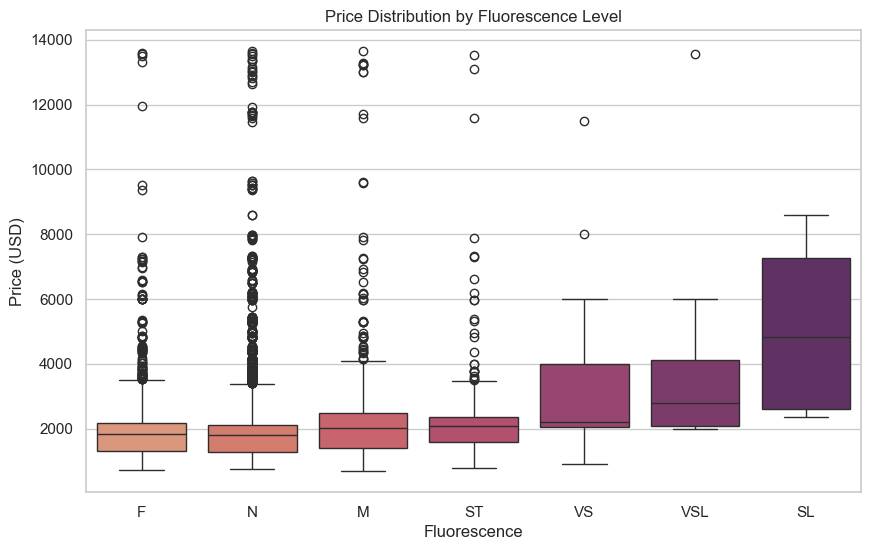

In [9]:
sns.set_theme(style="whitegrid")

# 1. Relationship between Weight (continuous) and Price
plt.figure(figsize=(8,6))
sns.regplot(x='weight', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title("Weight vs Price")
plt.xlabel("Weight (Carat)")
plt.ylabel("Price (USD)")
plt.show()

# 2. Relationship between Length (continuous) and Price
plt.figure(figsize=(8,6))
sns.regplot(x='length', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Length vs Price")
plt.xlabel("Length (mm)")
plt.ylabel("Price (USD)")
plt.show()

# 3. Relationship between Width (continuous) and Price
plt.figure(figsize=(8,6))
sns.regplot(x='width', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title("Width vs Price")
plt.xlabel("Width (mm)")
plt.ylabel("Price (USD)")
plt.show()

# 4. Relationship between Depth (continuous) and Price
plt.figure(figsize=(8,6))
sns.regplot(x='depth', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'purple'})
plt.title("Depth vs Price")
plt.xlabel("Depth (mm)")
plt.ylabel("Price (USD)")
plt.show()

# 5. Distribution of Price by Shape (categorical)
plt.figure(figsize=(10,6))
sns.boxplot(x='shape', y='price', data=df)
plt.title("Price Distribution by Shape")
plt.xlabel("Shape")
plt.ylabel("Price (USD)")
plt.show()

# 6. Distribution of Price by Clarity (categorical)
plt.figure(figsize=(10,6))
sns.violinplot(x='clarity', y='price', data=df, inner='box')
plt.title("Price Distribution by Clarity")
plt.xlabel("Clarity Grade")
plt.ylabel("Price (USD)")
plt.show()

# 7. Distribution of Price by Color (categorical)
plt.figure(figsize=(10,6))
sns.boxplot(x='color', y='price', data=df, palette='coolwarm')
plt.title("Price Distribution by Color")
plt.xlabel("Color Grade")
plt.ylabel("Price (USD)")
plt.show()

# 8. Distribution of Price by Cut (categorical)
plt.figure(figsize=(10,6))
sns.violinplot(x='cut', y='price', data=df, inner='quartile', palette='Set2')
plt.title("Price Distribution by Cut Quality")
plt.xlabel("Cut Quality")
plt.ylabel("Price (USD)")
plt.show()

# 9. Distribution of Price by Polish (categorical)
plt.figure(figsize=(10,6))
sns.boxplot(x='polish', y='price', data=df, palette='Set3')
plt.title("Price Distribution by Polish Grade")
plt.xlabel("Polish Grade")
plt.ylabel("Price (USD)")
plt.show()

# 10. Distribution of Price by Fluorescence (categorical)
plt.figure(figsize=(10,6))
sns.boxplot(x='fluorescence', y='price', data=df, palette='flare')
plt.title("Price Distribution by Fluorescence Level")
plt.xlabel("Fluorescence")
plt.ylabel("Price (USD)")
plt.show()


3. Basic Model Pipeline - XGBoost

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6229 entries, 0 to 6338
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weight                6229 non-null   float64
 1   clarity               6229 non-null   object 
 2   color                 6229 non-null   object 
 3   cut                   6229 non-null   object 
 4   polish                6229 non-null   object 
 5   symmetry              6229 non-null   object 
 6   fluorescence          6229 non-null   object 
 7   price                 6229 non-null   float64
 8   length                6229 non-null   float64
 9   width                 6229 non-null   float64
 10  depth                 6229 non-null   float64
 11  shape_CUSHION         6229 non-null   uint8  
 12  shape_EMERALD         6229 non-null   uint8  
 13  shape_HEART           6229 non-null   uint8  
 14  shape_MARQUISE        6229 non-null   uint8  
 15  shape_OVAL           

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


non_feature_columns = ['id']
non_encoded_categorical_columns = ['clarity', 'color', 'cut', 'polish', 'symmetry', 'fluorescence']
df = df.drop(columns=non_feature_columns + non_encoded_categorical_columns)


X = df.drop('price', axis=1)  # Features
y = df['price']  # Target (price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xg_regressor.fit(X_train, y_train)
y_pred = xg_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(50))


Mean Absolute Error: 191.3118530822068
       Actual    Predicted
5124  4029.32  4499.106445
2411  2039.46  2086.489990
3551  6840.40  8018.085938
230   1551.61  1678.729614
378   1315.39  1312.531372
5075  5289.38  5155.724121
2459  2073.85  2057.746826
4545  3389.88  3214.664551
351   1443.29  1362.738770
1120  1409.15  1590.615479
6054  1598.64  1765.205933
1043  1188.42  1142.086426
6245  2043.45  1948.255737
5540   999.50   925.415161
1189  1658.90  1628.540649
4205  2274.17  2178.911865
672   1028.04  1085.972046
1922  1973.02  1904.586670
4190  2090.03  2273.054199
4896  2748.27  2513.706543
4569  3498.72  3513.044678
5868  1324.17  1240.063721
4498  3236.98  3958.771240
2139  2041.08  2036.383789
5676   915.98  1096.516968
5922  1748.41  1399.574829
5115  4007.66  4108.110840
3969   963.05  1026.779663
736   1066.63  1095.895142
2877  2067.16  2107.696777
3009  2197.80  2118.699219
865   1173.57  1098.494263
4751  2487.60  2460.723877
1761  1530.31  1766.767212
5780  1107.02  1

4. Error analysis

In [72]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

In [73]:
r2_score(y_test, y_pred)

0.8565848521728218

In [75]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,y_pred)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, y_pred)))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

## residuals
residuals = y_test - y_pred
max_error = residuals.abs().max()
max_idx = residuals[residuals==max_error].index[0]
#max_true, max_pred = y_test.loc[max_idx], prediction[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.069
Mean Absolute Error (Σ|y - pred|/n): 191
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 547
Max Error: 6,709


<Axes: ylabel='price'>

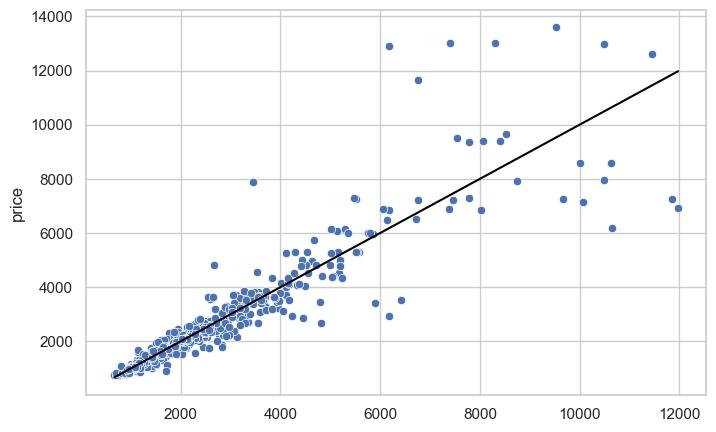

In [77]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=y_pred,y=y_test,ax=ax)
sns.lineplot(x=y_pred,y=y_pred,ax=ax,color='black')

Identifying Items with Worst and Best Performance 

Top 10 Worst Predictions:
        y_test        y_pred        error
5229  12892.04   6182.559082  6709.480918
5234  13019.69   7400.472168  5619.217832
3560   6937.91  11972.866211  5034.956211
5201  11643.30   6757.568359  4885.731641
5233  12997.82   8306.200195  4691.619805
3572   7252.10  11859.829102  4607.729102
5171   7898.48   3440.829590  4457.650410
5020   6182.97  10638.516602  4455.546602
3271  13595.21   9523.153320  4072.056680
3420   2939.62   6170.885254  3231.265254

Top 10 Best Predictions:
       y_test       y_pred     error
5485  1134.18  1134.230103  0.050103
1176  1369.42  1369.253296  0.166704
764   1030.06  1029.863647  0.196353
5388  1005.80  1005.581116  0.218884
1187  1658.80  1658.517212  0.282788
4001  1773.02  1772.538330  0.481670
5004  4156.69  4156.169434  0.520566
2182  2105.01  2104.229492  0.780508
915   1184.12  1183.333252  0.786748
2165  2089.58  2088.729004  0.850996


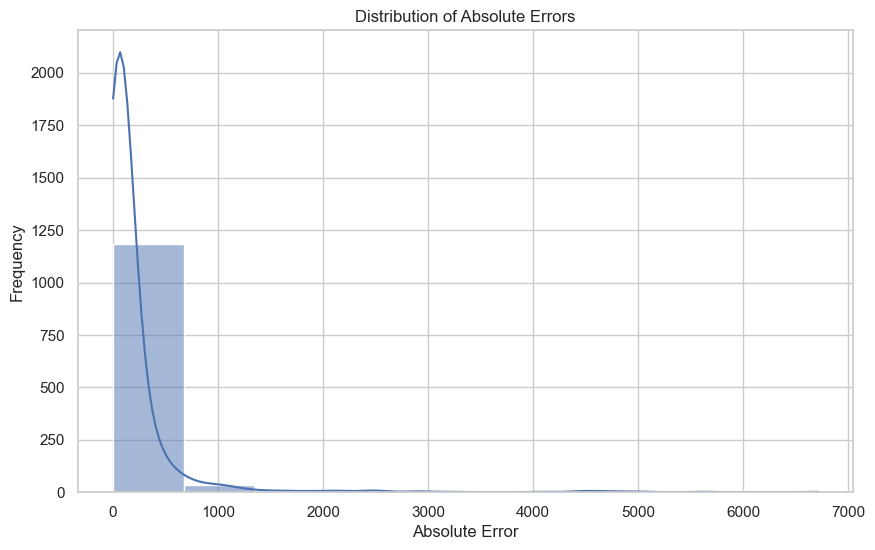

In [70]:
# Calculate absolute errors
errors = np.abs(y_test - y_pred)
error_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'error': errors
})

# Identify top 10 worst predictions
worst_predictions = error_df.nlargest(10, 'error')
print("Top 10 Worst Predictions:")
print(worst_predictions)

# Identify top 10 best predictions
best_predictions = error_df.nsmallest(10, 'error')
print("\nTop 10 Best Predictions:")
print(best_predictions)

# Visualization: Histogram of Errors
plt.figure(figsize=(10,6))
sns.histplot(errors, bins=10, kde=True)
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()


Todo: explain why do I think that is?

Is the model mostly overestimating or underestimating?

Mean Residual: -3.54


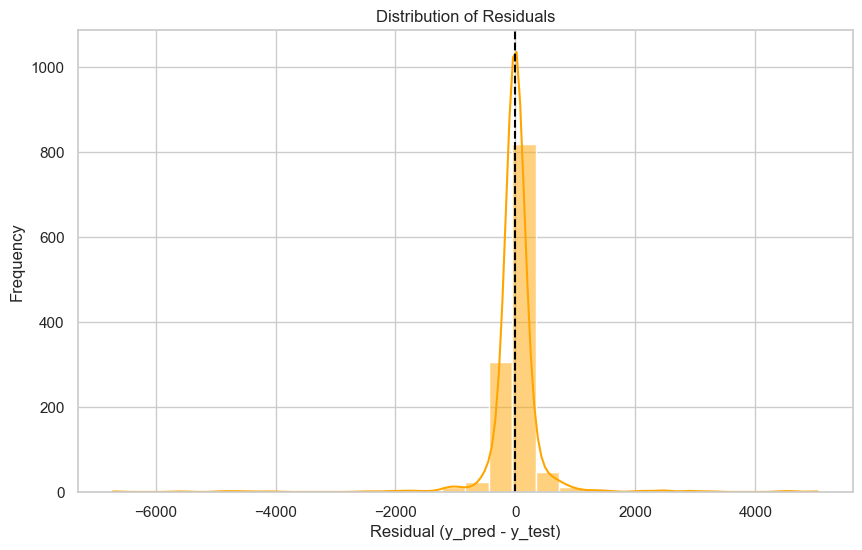

The model is mostly underestimating.


In [71]:
# Calculate residuals
residuals = y_pred - y_test
residual_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'residual': residuals
})

# Calculate the mean residual
mean_residual = residuals.mean()
print(f"Mean Residual: {mean_residual:.2f}")

# Visualization: Residuals Distribution
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.axvline(0, color='black', linestyle='--')
plt.title('Distribution of Residuals')
plt.xlabel('Residual (y_pred - y_test)')
plt.ylabel('Frequency')
plt.show()

# Bias assessment
if mean_residual > 0:
    print("The model is mostly overestimating.")
elif mean_residual < 0:
    print("The model is mostly underestimating.")
else:
    print("The model has no significant bias towards overestimation or underestimation.")
